In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

import seaborn as sns

import pandas as pd

import warnings

import numpy as np

import scipy.stats as st
from scipy.optimize import OptimizeWarning

warnings.filterwarnings("ignore", message="Workbook contains no default style")

FILE_PATH = 'C:\\Users\\vladi\\.vscode\\Git\\SM_25\\SM_25\\cursova\\'
RUN_TIME = 1440.0

In [19]:
def get_verification():
    filename = 'verification'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    df = df.groupby('test_mask').mean().reset_index()

    return df

get_verification()

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time,mean_wait_q
0,0,179.686,1.503234,88.090,0.537735,0.875849,0.058983,65.906875,24.210604
1,1,360.551,41.923265,96.077,0.586980,0.953667,0.064195,695.295260,629.564039
2,2,178.826,0.394037,88.991,0.367643,0.803279,0.060135,41.131325,6.217513
3,3,179.598,0.343065,89.402,0.552817,0.729469,0.060663,35.012498,5.426990
4,4,179.443,1.040506,88.611,0.544564,0.848700,0.059507,55.566119,16.637930
5,5,179.349,1.248576,88.348,0.417597,0.878450,0.059191,61.549186,20.045646
6,6,179.594,0.408558,89.337,0.550697,0.753054,0.060081,47.458500,6.461678


In [20]:
def get_trans_period():
    filename = 'trans'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    #df = df.groupby('test_mask').mean().reset_index()
    
    return df

trans = get_trans_period()
trans

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time,mean_wait_q
0,0,178,0.660144,88,0.537464,0.871234,0.057639,54.070443,10.802357
1,0,176,0.747328,88,0.503206,0.872192,0.059028,53.161071,12.229008
2,0,187,3.649879,91,0.663116,0.933192,0.059722,104.873018,57.756326
3,0,178,1.313247,89,0.539401,0.914591,0.059722,63.329692,21.248035
4,0,164,0.447114,82,0.481069,0.792395,0.054861,47.756969,7.851753
...,...,...,...,...,...,...,...,...,...
5995,20000,194,5.380144,93,0.618616,0.975198,0.064583,125.490229,83.305456
5996,20000,198,2.299924,94,0.551717,0.952277,0.065278,75.202493,35.232873
5997,20000,194,3.791787,95,0.555303,0.968554,0.065278,96.563012,57.475502
5998,20000,170,2.543252,88,0.537515,0.941226,0.062500,81.590889,41.616846


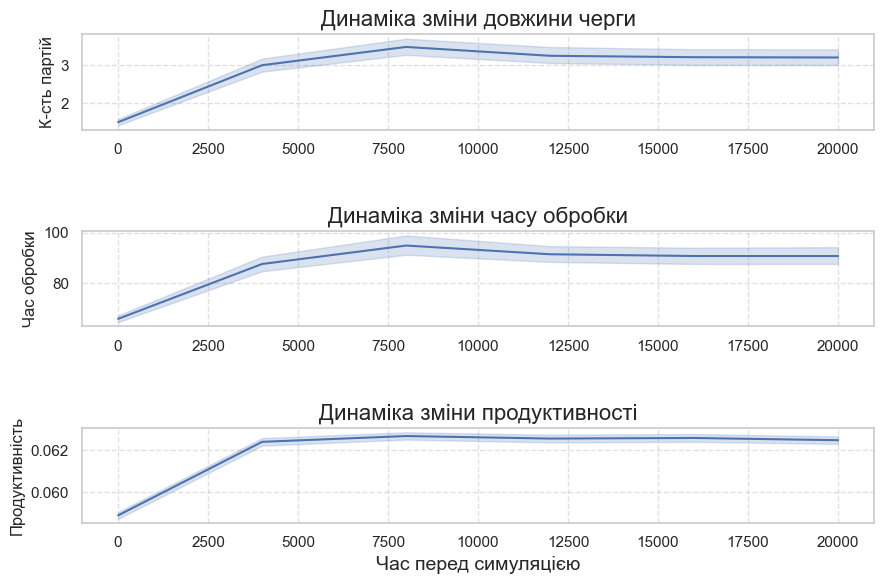

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(9, 6), sharex=True)

plot_kws = {
    'x': 'test_mask',
    'data': trans,
}

sns.lineplot(y='mean_q_size', ax=axes[0], **plot_kws)
axes[0].set_title('Динаміка зміни довжини черги', fontsize=16)
axes[0].set_ylabel('К-сть партій', fontsize=12)

sns.lineplot(y='processing_time', ax=axes[1], **plot_kws)
axes[1].set_title('Динаміка зміни часу обробки', fontsize=16)
axes[1].set_ylabel('Час обробки', fontsize=12)

sns.lineplot(y='productivity', ax=axes[2], **plot_kws)
axes[2].set_title('Динаміка зміни продуктивності', fontsize=16)
axes[2].set_ylabel('Продуктивність', fontsize=12)
axes[2].set_xlabel('Час перед симуляцією', fontsize=14)

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(labelbottom=True) 

plt.tight_layout(h_pad=3.0)
plt.show()

In [22]:
def get_result():
    filename = 'result'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")

    return df

result = get_result()
result

,test_mask,prod_served,mean_q_size,q_served,m_loader_util,m_truck_util,productivity,processing_time,mean_wait_q
0,0,168,0.427273,84,0.456979,0.821765,0.057639,46.804058,7.324681
1,0,177,4.592061,96,0.562497,0.967875,0.065972,109.204300,68.880908
2,0,205,2.657893,97,0.568781,0.949637,0.068056,77.157135,39.457384
3,0,185,2.869875,87,0.582071,0.903397,0.059722,90.794097,47.501374
4,0,179,0.666576,88,0.573987,0.891788,0.059722,52.177492,10.907613
...,...,...,...,...,...,...,...,...,...
9995,0,175,1.290632,90,0.578956,0.945855,0.062500,62.093511,20.650118
9996,0,183,3.679834,96,0.556063,0.958442,0.064583,96.051048,55.197516
9997,0,167,1.997181,87,0.579027,0.953767,0.059722,77.729704,33.056789
9998,0,189,1.501922,94,0.516783,0.936958,0.062500,63.088354,23.008163


In [23]:
df = result

In [24]:
def get_best_distribution(data):
    dist_names = ["norm", "expon", "lognorm", "uniform", 'beta']
    dist_results = []
    params = {}
    
    # Get data for the histogram
    y, x = np.histogram(data, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Temporarily suppress warnings during the fitting loop
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        
        for dist_name in dist_names:
            dist = getattr(st, dist_name)
            try:
                # Special handling for Beta: check boundaries
                if dist_name == 'beta':
                    if np.min(data) < 0 or np.max(data) > 1:
                        # Beta does not work outside [0, 1], skip
                        continue
                
                # fit() might throw RuntimeWarning, which we ignore via catch_warnings
                param = dist.fit(data)
                
                params[dist_name] = param
                
                # Calculate PDF
                arg = param[:-2]
                loc = param[-2]
                scale = param[-1]
                pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
                
                # Check for NaN (if fitting passed but produced garbage)
                if np.any(np.isnan(pdf)):
                    continue

                sse = np.sum(np.power(y - pdf, 2.0))
                dist_results.append((dist_name, sse))
            except Exception:
                # If fit fails with an error - just move on
                continue
    
    if dist_results:
        best_dist, best_sse = sorted(dist_results, key=lambda x: x[1])[0]
        return best_dist, params[best_dist]
    return None, None

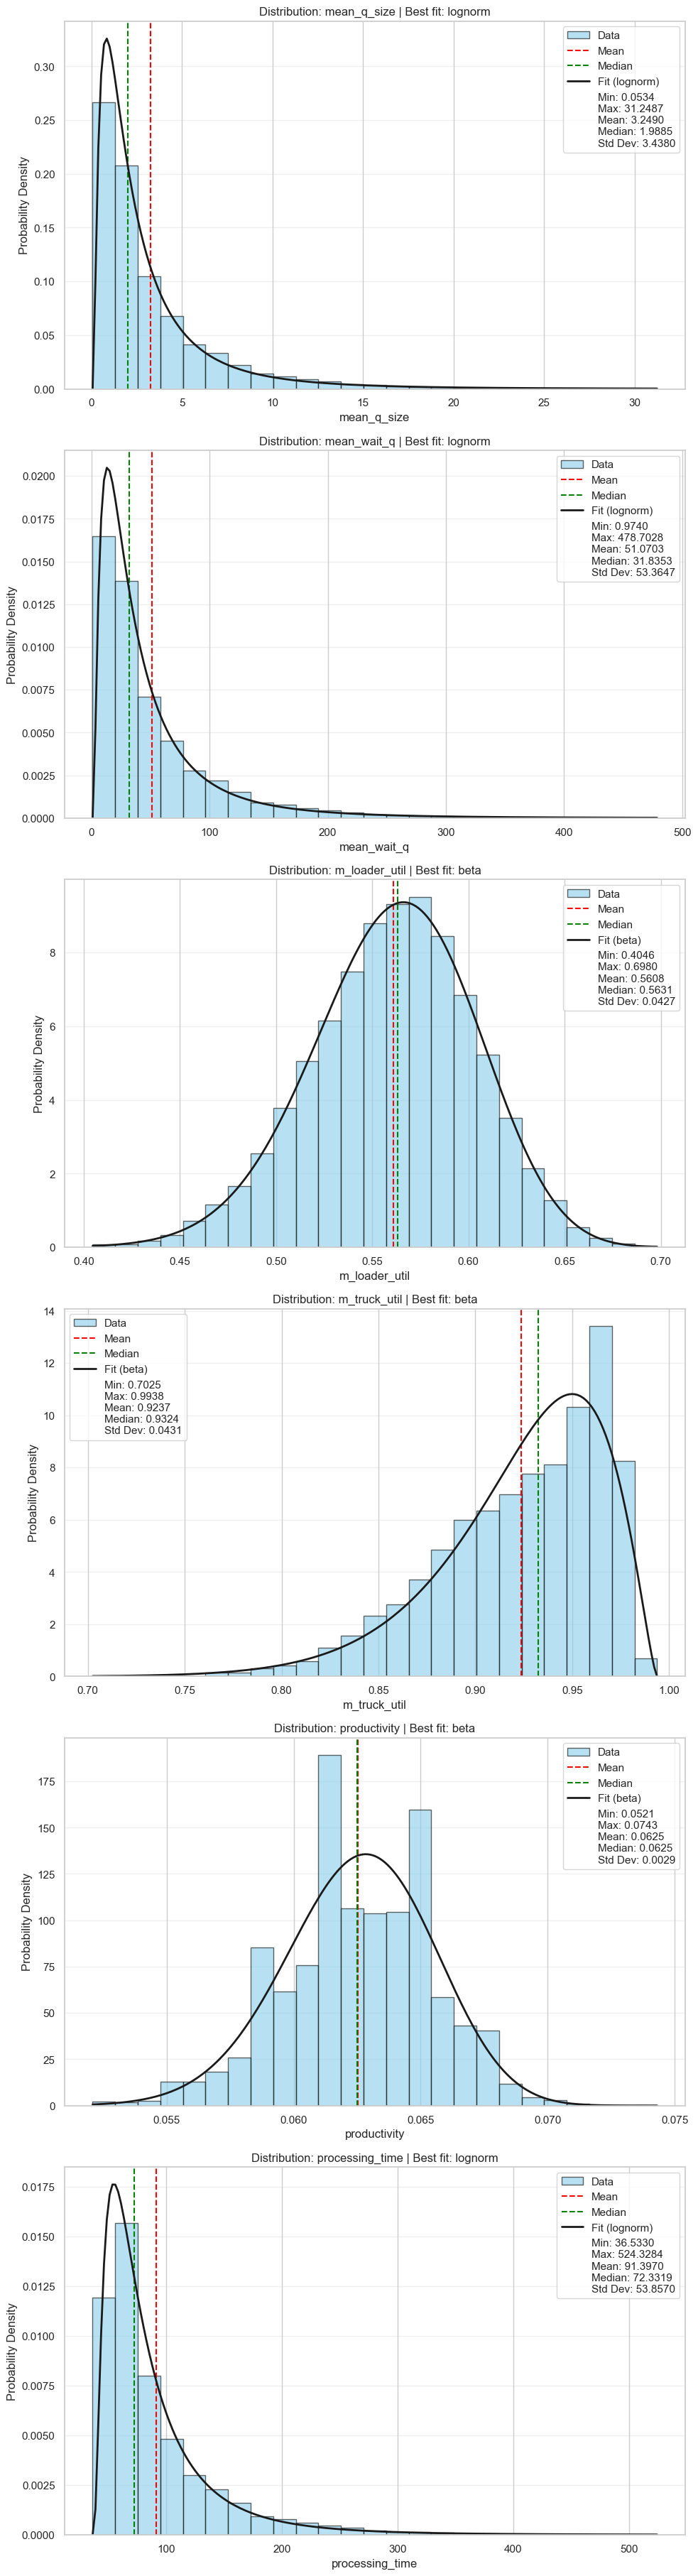

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
import numpy as np

columns_to_plot = [
    'mean_q_size',
    'mean_wait_q',
    'm_loader_util', 
    'm_truck_util', 
    'productivity', 
    'processing_time',
]

num_plots = len(columns_to_plot)
cols = 1 
rows = (num_plots + 1) // cols

plt.figure(figsize=(10, 6 * rows))

for i, col_name in enumerate(columns_to_plot):
    if col_name in df.columns:
        ax = plt.subplot(rows, cols, i + 1)
        
        data_clean = df[col_name].dropna()
        
        plt.hist(data_clean, bins=25, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Data')
        
        mean_val = data_clean.mean()
        median_val = data_clean.median()
        min_val = data_clean.min()
        max_val = data_clean.max()
        
        std_val = data_clean.std()
        
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label='Median')
        
        best_dist_name, best_dist_params = get_best_distribution(data_clean)
        
        dist_title_add = ""
        if best_dist_name:
            dist_title_add = f" | Best fit: {best_dist_name}"
            
            x_linspace = np.linspace(min_val, max_val, 200)
            dist = getattr(st, best_dist_name)
            
            arg = best_dist_params[:-2]
            loc = best_dist_params[-2]
            scale = best_dist_params[-1]
            
            y_pdf = dist.pdf(x_linspace, loc=loc, scale=scale, *arg)
            plt.plot(x_linspace, y_pdf, 'k-', linewidth=2, label=f'Fit ({best_dist_name})')

        stats_label = (f'Min: {min_val:.4f}\n'
                       f'Max: {max_val:.4f}\n'
                       f'Mean: {mean_val:.4f}\n'
                       f'Median: {median_val:.4f}\n'
                       f'Std Dev: {std_val:.4f}')
        
        stats_patch = mpatches.Patch(color='none', label=stats_label)
        
        handles, labels = ax.get_legend_handles_labels()
        handles.append(stats_patch)
        
        plt.title(f'Distribution: {col_name}{dist_title_add}')
        plt.xlabel(col_name)
        plt.ylabel('Probability Density')
        plt.legend(handles=handles)
        plt.grid(axis='y', alpha=0.3)
    else:
        print(f"Warning: Column '{col_name}' not found in DataFrame")

plt.tight_layout()
plt.show()